In [1]:
from qd_rdf import get_dots, data_path, plot_rdf
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rdfs = []


/home/GWENWHITE/mse150projects/QD-Paper-RDF/qd_rdf.py:29: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  coordinates = peak_local_max(i1, min_distance=spacing,indices=False)


268.4140635475095


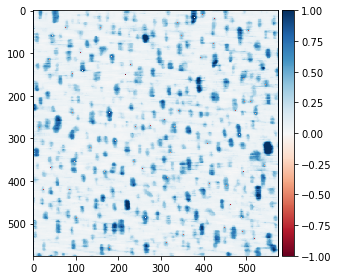

In [3]:
L=5
R=[]
dots=get_dots(data_path+"404/0.5a.tif",compare=True,microns=L,size=5, spacing=10)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

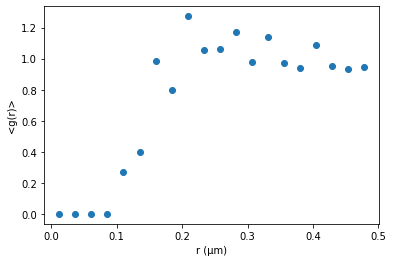

In [4]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


270.3690352179376


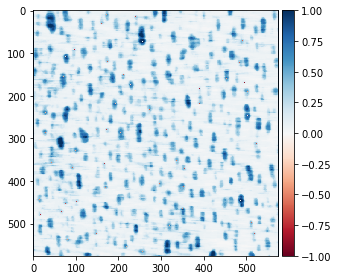

In [5]:
L=5
R=[]
dots=get_dots(data_path+"404/0.5b.tif",compare=True,microns=L,size=5, spacing=10)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

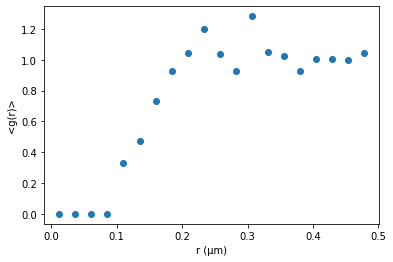

In [6]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


276.92438781085565


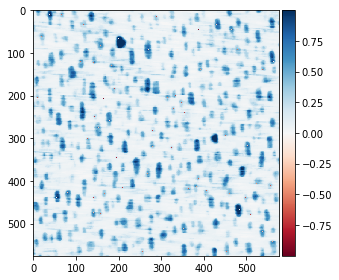

In [7]:
L=5
R=[]
dots=get_dots(data_path+"404/0.5c.tif",compare=True,microns=L,size=5, spacing=10)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

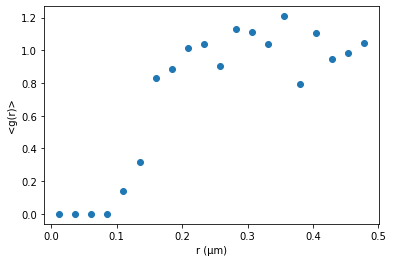

In [8]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


269.1909510290827


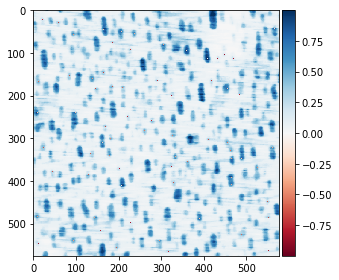

In [9]:
L=5
R=[]
dots=get_dots(data_path+"404/0.5d.tif",compare=True,microns=L,size=5, spacing=10)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

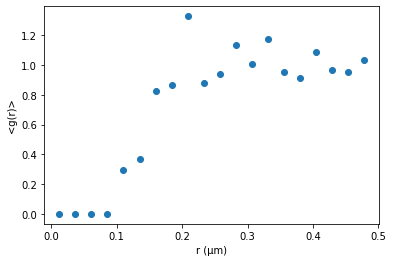

In [10]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


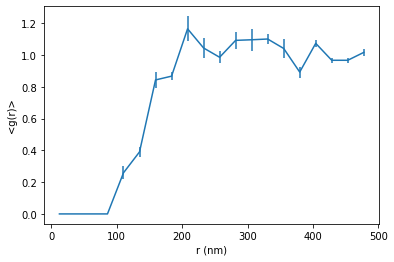

In [11]:
rdfs = np.asarray(rdfs)
mean_count = np.mean(rdfs,axis=0)
sem =  stats.sem(rdfs, axis=0, ddof=1)
r,rdf = plot_rdf(dots,L,plot=False)
plt.errorbar(1000*r, mean_count, yerr=sem)
plt.xlabel("r (nm)")
#plt.xlabel("r/<R>")
plt.ylabel("<g(r)>")
plt.savefig("M404.png")
np.savetxt("M404.csv",(1000*r,mean_count,sem),delimiter=',')
plt.show()

In [12]:
R

[269.1909510290827]

In [13]:
print(np.mean(R),np.std(R))

269.1909510290827 0.0
